<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Первичный-осмотр-данных" data-toc-modified-id="Первичный-осмотр-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Первичный осмотр данных</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Загрузка-библиотек" data-toc-modified-id="Загрузка-библиотек-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка библиотек</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Знакомство с данными</a></span></li></ul></li><li><span><a href="#Найдём-высоконагруженные-“горячие”-объекты-хранилища-данных-и-спрогнозируем-потенциальный-рост-нагрузки." data-toc-modified-id="Найдём-высоконагруженные-“горячие”-объекты-хранилища-данных-и-спрогнозируем-потенциальный-рост-нагрузки.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Найдём высоконагруженные “горячие” объекты хранилища данных и спрогнозируем потенциальный рост нагрузки.</a></span><ul class="toc-item"><li><span><a href="#Найдём-таблицы,-в-которые-записываются-данные-(кем-угодно),-но-которые-не-читаются-разработчиками,-ранжировать-по-степени-«неиспользуемости»" data-toc-modified-id="Найдём-таблицы,-в-которые-записываются-данные-(кем-угодно),-но-которые-не-читаются-разработчиками,-ранжировать-по-степени-«неиспользуемости»-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Найдём таблицы, в которые записываются данные (кем угодно), но которые не читаются разработчиками, ранжировать по степени «неиспользуемости»</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Поиск-тяжелых-объектов" data-toc-modified-id="Поиск-тяжелых-объектов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Поиск тяжелых объектов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

<a id='intro'></a>

# Интеллектуальный анализ работы хранилища данных на основании обработки логов

**Наша задача - Найти высоконагруженные “горячие” объекты хранилища данных и спрогнозировать потенциальный рост нагрузки.**  

**Описание задачи:**  

- На основе предоставленных логов хранилища необходимо разработать алгоритм обработки данных и прогнозирования будущей нагрузки. Важно частью задачи является выявление и распределение объектов хранилища по различным критериям.     


- В качестве исходных данных предоставлен набор логов, которые содержат запросы к базе данных GreenPlum. Нужно предложить метод быстрой обработки этих данных. Выделению отдельных объектов, к которым чаще всего обращаются пользователи. Выявления самых “тяжелыx” и самых “горячих” объектов. Прогнозирование нагрузки на систему в разные временные отрезки.    


- Задача со звёздочкой: прогнозирования времени исполнения запроса по предоставленным данным.   

**Технические требования:**  

- Можно использовать только свободное ПО. Язык: Python или Java  

**Критерии оценки:**  

- Технические и инфраструктурные критерии:   

  - Запускаемость  
  - Скорость работы решения  
  - Адаптируемость и масштабируемость  
  - Качество кода   
  
  
- Бизнес-критерии:

  - Полезность   
  - Применимость   
  
**Правила:**  

- Для реализации проекта был создан репозиторий Gitlab.    
- Нам следует авторизоваться по ссылке и доступам, указанным ниже.  

## Первичный осмотр данных

- Загрузить данные и изучить общую информацию, размер датасета;  
- Убедимся, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. При необходимости обработать их.    

### Описание данных

Путь к файлу log_week_end: https://disk.yandex.ru/d/Q2KNJWRi2arx_Q  
Путь к файлу log_week_2_end: https://disk.yandex.ru/d/GVpEe9rX0poZhw

**Данные таблиц содержат в себя следующие поля:**  

`Rn` – уникальный номер записи  
`Loguser` – пользователь (dev_* - разработчики, etl_* - загрузчик)  
`Query` – запрос в базу:  
  - `from, join` - извлечение данных  
  - `into` - запись данных  
  
`duration` - время, мс  


### Загрузка библиотек

In [1]:
import pandas as pd                                         # для анализа данных
import numpy as np                                          # для математических вычислений
import math as mth                                          # для математических вычислений

In [2]:
from urllib.parse import urlencode                          # преобразует объект сопоставления (словарь)
                                                            # или последовательность кортежей,
                                                            # состоящих из 2-х элементов в текстовую ASCII строку
                                                            # с процентным кодированием. 
import requests                                             #  модуль Python, который можно
                                                            # использовать для отправки всех видов HTTP-запросов 
import re

C:\Users\Denis\anaconda3\envs\da_practicum_env\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
import matplotlib.pyplot as plt                             # для визуализации 

### Загрузка данных

[К началу тетрадки](#intro)

Загружаем данные (без скачивания файлов):

In [4]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = ['https://disk.yandex.ru/d/Q2KNJWRi2arx_Q', 
              'https://disk.yandex.ru/d/GVpEe9rX0poZhw']                # ссылки на данные

file_names = ['log_week_end.csv', 
             'log_week_2_end.csv']                           # имена файлов

datasets = ['log', 'log_duration']

for i in range(2):
    # получаем загрузочную ссылку
    final_url = base_url + urlencode(dict(public_key=public_key[i]))
    response = requests.get(final_url)
    download_url = response.json()['href']
    
    # загружаем данные по ссылкам
    globals()[datasets[i]] = pd.read_csv(download_url)

### Знакомство с данными

Посмотрим сколько число строк в наших данных:  

In [5]:
print('Число строк в log:  ', log.shape[0])
print('Число строк в log_duration: ', log_duration.shape[0])

Число строк в log:   641138
Число строк в log_duration:  630078


Получим 10 случайно выбранных записей из таблицы log:

In [6]:
log.sample(10, random_state=123)

,rn,loguser,query
74146,517943,etl_2048,"into tbl_61646,join tbl_61646,from tbl_61647"
165442,560477,etl_2048,from tbl_126126
362881,1007386,dev_1586,into tbl_24696
157006,28189,dev_332,"into tbl_33185,from tbl_44922"
186343,716268,etl_2048,from tbl_92054
408110,132108,etl_1358,"JOIN tbl_33595,FROM tbl_33623"
334260,567276,etl_2048,"into tbl_82219,join tbl_82219,from tbl_82218"
445272,582828,etl_2048,"into tbl_195316,join tbl_195316,from tbl_195318"
80402,906050,etl_2048,from tbl_72527
544598,913957,etl_2048,"into tbl_159591,join tbl_159591,from tbl_159592"


Получим 10 случайно выбранных записей из таблицы log_duration:

In [7]:
log_duration.sample(10, random_state=123)

,rn,loguser,query,duration
621170,819286,etl_2048,"from tbl_156331,join tbl_156333",duration: 7598.240 ms
419051,24352121,dev_332,"from tbl_7207,from tbl_11022",duration: 179.564 ms
471923,28824183,etl_2048,from tbl_83286,duration: 555.342 ms
364132,21408555,etl_528,from tbl_161642,duration: 57.124 ms
185219,11870777,etl_2048,from tbl_176470,duration: 1407.468 ms
554888,752123,etl_2048,from tbl_88666,duration: 49.775 ms
104679,22686752,etl_1151,from tbl_10028,duration: 389.451 ms
244662,7285608,etl_2048,from tbl_47222,duration: 28.671 ms
474319,21152966,etl_1151,from tbl_21412,duration: 1270.793 ms
37671,23949395,etl_1151,"into tbl_147243,from tbl_149109",NaN


Посмотрим общую информацию датасета `log`:

In [8]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641138 entries, 0 to 641137
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   rn       641138 non-null  int64 
 1   loguser  641138 non-null  object
 2   query    641138 non-null  object
dtypes: int64(1), object(2)
memory usage: 14.7+ MB


 Мы видим, что в таблице 3 столбца и 641138 строк, пропуски отсутствуют.  

Посмотрим общую информацию датасета `log_duration`:

In [9]:
log_duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630078 entries, 0 to 630077
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   rn        630078 non-null  int64 
 1   loguser   630078 non-null  object
 2   query     630078 non-null  object
 3   duration  557929 non-null  object
dtypes: int64(1), object(3)
memory usage: 19.2+ MB


Проверим сколько записей в этой колонке `duration` датасета `log_duration` отсутствует.

In [10]:
log_duration.duration.isna().sum()

72149

В таблице мы видим 4 столбца, 630078 строк, в столбце `duration`отсутствует 72149 записей.  

## Найдём высоконагруженные “горячие” объекты хранилища данных и спрогнозируем потенциальный рост нагрузки.

[К началу тетрадки](#intro)

Для реализации этой задачи, нам необходимо ответить на несколько вопросов или разбить на несколько подзадач:

### Найдём таблицы, в которые записываются данные (кем угодно), но которые не читаются разработчиками, ранжировать по степени «неиспользуемости»


Для решения этой задачи будем использовать данные, представленные в датафрейме `log`. Ещё раз посмотрим эту таблицу(первые 5 строк):

In [11]:
log.head()

,rn,loguser,query
0,2530,etl_2048,"from tbl_157224,join tbl_157223"
1,5658,etl_2048,"from tbl_195789,join tbl_195791"
2,14087,etl_2048,"from tbl_144504,join tbl_144505"
3,1272,etl_1151,"JOIN tbl_17535,join tbl_21652,JOIN tbl_26976,f..."
4,9974,etl_1151,"from tbl_8053,join tbl_9874,join tbl_10303,int..."


Мы видим, что в столбце `query` используются утилиты разных регистров. Преобразуем данные  в столбце и приведём их к нижнему регистру:

In [12]:
log['query'] = log['query'].str.lower()

Найдем уникальные значения в столбце query:

In [13]:
log['query'].value_counts().sum()

641138

Мы видим что в столбце `query` 66735 уникальных строк.

Но в нашей задаче нужно найти данные, которые только записываются, т.к. за эту работу отвечает утилита из SQL -"INTO', значит будем отбирать данные,где есть "INTO":

In [14]:
log_opt=log[log['query'].str.contains("into", regex=False)] # добавляем regex=False, т.к с точки зрения производительности
                                                            # поиск по регулярному выражению медленнее, чем поиск подстроки

In [15]:
log_opt['query'].value_counts().sum()

190710

Мы отобрали данные, которые записываются в таблицу, у нас таких 190710 уникальных записей.Посмотрим их:

In [16]:
log_opt['loguser'].value_counts()

etl_1151    111213
etl_2048     52925
dev_1586     19482
dev_332       4130
etl_1157       826
etl_1162       619
etl_1358       467
etl_1330       320
dev_473        307
dev_1136       232
dev_136         73
dev_2026        28
dev_2192        20
dev_1881        20
dev_1828        17
dev_554         13
dev_1714         6
etl_1165         6
dev_114          2
dev_2113         2
dev_390          1
dev_1820         1
Name: loguser, dtype: int64

Но по условию задачи нам нужны данные, которые не учитываются разработчиками. В столбце `loguser`мы будем искать только данные, которые начинаются с "etl_".

In [17]:
log_opt=log_opt[log_opt['loguser'].str.contains(r'\betl_')]

In [18]:
log_opt['loguser'].value_counts().sum()

166376

У нас получилось 166376 таких записей, которые не читаются разработчиками.Посмотрим их:

In [19]:
log_opt['loguser'].value_counts()

etl_1151    111213
etl_2048     52925
etl_1157       826
etl_1162       619
etl_1358       467
etl_1330       320
etl_1165         6
Name: loguser, dtype: int64

Теперь посмотрим нашу финальную таблицу:

In [20]:
log_opt

,rn,loguser,query
3,1272,etl_1151,"join tbl_17535,join tbl_21652,join tbl_26976,f..."
4,9974,etl_1151,"from tbl_8053,join tbl_9874,join tbl_10303,int..."
15,871,etl_1151,"join tbl_10099,join tbl_10099,join tbl_19156,j..."
18,464,etl_1151,"join tbl_20055,from tbl_40941,from tbl_379369,..."
22,8033,etl_1151,"join tbl_8053,join tbl_10303,join tbl_14638,jo..."
...,...,...,...
641102,989796,etl_1151,"into tbl_196086,join tbl_196421,from tbl_196580"
641103,588404,etl_1151,into tbl_341408
641105,385606,etl_1358,into tbl_22268
641126,326792,etl_2048,"into tbl_119678,join tbl_119678,from tbl_119679"


У нас получился датафрейм, который удовлетворяет условию задачи. Теперь нам нужно из столбца `query` вытащить все таблицы ( tbl_...):

In [21]:
log_opt['query']=log_opt['query'].apply(lambda x: x.replace('join', '').replace('from', '').replace('into', '').replace(' ', ''))
log_tabl=log_opt['query'].reset_index() # работаем с одним столбцом
log_tabl=log_tabl.assign(query=log_opt['query'].str.split(',')).explode('query') #разделяем строку, в качестве разделителя запятая
log_tabl = log_tabl[log_tabl['query'].notna()] # удаляем строки с Nan

Посмотрим что получилось  и ранжируем их по убыванию:

In [22]:
log_tabl['query'].value_counts()

tbl_27182     2288
tbl_20007     1873
tbl_14714     1873
tbl_26976     1020
tbl_225891     987
              ... 
tbl_36320        1
tbl_207833       1
tbl_176008       1
tbl_94241        1
tbl_193453       1
Name: query, Length: 28371, dtype: int64

Найдём общее количество запросов к таблицам:

In [23]:
log_tabl['query'].value_counts().sum()

228540

У нас получилось 228540 различных запросов к уникальным таблицам, которые не читаются разработчиками.

Посмотрим список самых  нечитаемых разработчиками таблиц:

In [24]:
display(log_tabl['query'].value_counts().head(10))

tbl_27182     2288
tbl_20007     1873
tbl_14714     1873
tbl_26976     1020
tbl_225891     987
tbl_10099      975
tbl_20055      960
tbl_19156      953
tbl_12737      952
tbl_9859       909
Name: query, dtype: int64

Посмотрим структуру в процентах:

In [25]:
display(log_tabl['query'].value_counts(normalize=True).head(10))

tbl_27182     0.010011
tbl_20007     0.008196
tbl_14714     0.008196
tbl_26976     0.004463
tbl_225891    0.004319
tbl_10099     0.004266
tbl_20055     0.004201
tbl_19156     0.004170
tbl_12737     0.004166
tbl_9859      0.003977
Name: query, dtype: float64

Найдём количество уникальных таблиц,в которые записываются данные кем угодно,но не читаются разработчиками:

In [26]:
log_tabl['query'].nunique()

28371

Общее количество уникальных таблиц, в которые записываются данные, но не читаются разработчиками составляет 28371 ед.

#### Вывод

**В нашем исследовании мы получили следующие результаты :**  

- Общее количество уникальных таблиц, в которые записываются данные (кем угодно), но не читаются разработчиками составляет 28371 ед.  

- Общее количество запросов к таблицам составило 228540 запросов   

- Самыми высоконагруженными “горячими” объектами хранилища данных, в которые записываются данные кем угодно, но не читаются разработчиками стала тройка лидеров, таблицы:   
  
    - tbl_27182 (2288 запросов или 1%)
    - tbl_14714 (1873 запросов или 0,8%)
    - tbl_20007 (1873 запросов или 0,8%)

### Поиск тяжелых объектов

[К началу тетрадки](#intro)

In [28]:
#избавимся от пропусков и дубликатов
df=log_duration.dropna().drop_duplicates(subset=['loguser','query','duration']) 
#Поправим duration чтобы там содержалось количество милисекунд тип float
df['duration']=df.duration.str.split().str[1] 
df['duration']=df['duration'].astype('float') 
#к нижнему регистру query
df['query']=df['query'].str.lower()
#добавим столбец в котором количество таблиц в запросе
df['tbls']=df['query'].str.count(',')+1
pd.options.display.float_format = '{:,.3f}'.format
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556590 entries, 0 to 630077
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   rn        556590 non-null  int64  
 1   loguser   556590 non-null  object 
 2   query     556590 non-null  object 
 3   duration  556590 non-null  float64
 4   tbls      556590 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 25.5+ MB


In [32]:
with pd.option_context('display.float_format', '{:0.2%}'.format):
    display(df.tbls.value_counts().to_frame().join(df.tbls.value_counts(normalize=True).rename('%')).head())

,tbls,%
1,357402,64.21%
2,111585,20.05%
3,84805,15.24%
4,822,0.15%
6,573,0.10%


более 64% запросов содержат обращение только к одному объекту.
Посмотрим какие из них выполнялись дольше всего

In [33]:
t1=df.query('tbls==1').groupby('query').agg({'duration':['min','mean','median','max','count']}).sort_values(
        by=('duration','median'),ascending=False)
t1.head(10)

duration                                               \
                           min           mean         median            max   
query                                                                         
from tbl_14996  10,666,177.688 11,117,907.134 11,219,406.572 11,366,637.702   
from tbl_308121  2,093,212.227  4,904,726.364  4,690,881.263  9,219,758.960   
from tbl_281142  2,209,101.673  2,520,295.504  2,473,347.411  3,125,306.230   
from tbl_309364  2,159,433.549  2,159,433.549  2,159,433.549  2,159,433.549   
from tbl_305654  1,661,187.815  1,713,216.093  1,718,636.326  1,759,824.139   
from tbl_230191      3,256.432    696,912.463    874,169.431  1,623,820.663   
from tbl_188049    737,207.224    738,126.174    738,126.174    739,045.124   
into tbl_193385    595,636.727    722,546.576    722,546.576    849,456.424   
from tbl_173857    605,915.321    805,362.717    718,979.299  1,390,661.906   
from tbl_308374      1,295.314    475,775.724    622,265.276    764,159.934   

                       
                count  
query                  
from tbl_14996      4  
from tbl_308121    25  
from tbl_281142     7  
from tbl_309364     1  
from tbl_305654     3  
from tbl_230191    40  
from tbl_188049     2  
into tbl_193385     2  
from tbl_173857    16  
from tbl_308374    39

Посмотрим к каким объектам обращались чаще всего

In [36]:
t1.sort_values(by='count',ascending=False).head(10)

,min,mean,median,max,count
query,,,,,
from tbl_22189,1.583,"2,872.095",9.928,"477,120.281",2350
into tbl_24696,69.316,"8,599.807","2,643.030","1,319,054.135",2198
from tbl_42632,11.260,"17,298.764","5,691.107","489,735.869",1787
into tbl_44933,269.878,732.056,576.934,"25,034.363",883
into tbl_211522,94.133,"2,492.865","1,382.687","124,369.579",841
from tbl_33184,161.115,"21,938.728","7,084.922","468,929.657",774
from tbl_26470,239.737,"3,292.961","2,370.605","80,347.968",768
from tbl_20560,21.984,531.525,210.297,"7,293.996",596
from tbl_8053,26.900,"1,560.498",347.507,"209,405.004",566


Из таблицы видно что время выполнения запросов очень сильно варьируются. Рассмотрим выполнение запроса "from tbl_42632" (3 место в таблице выше)

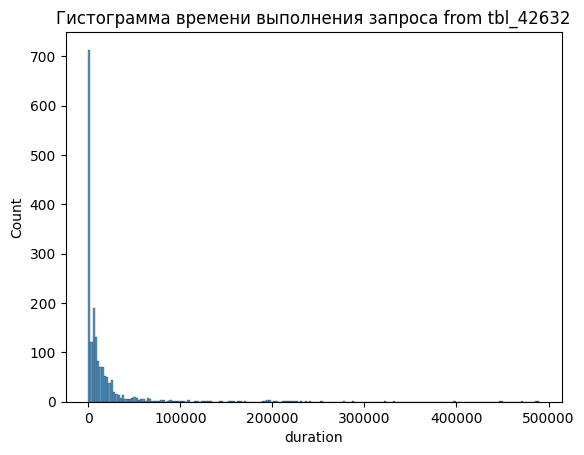

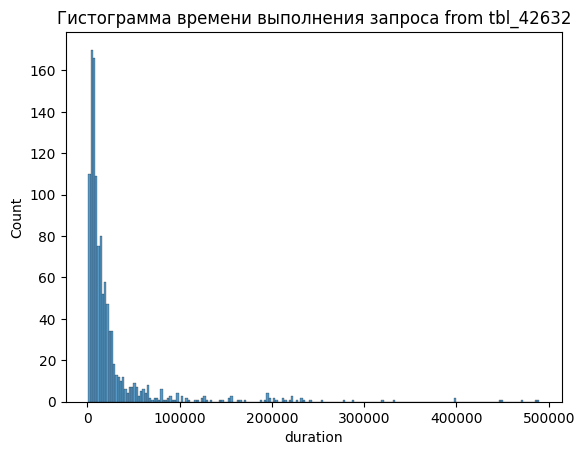

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df.query('query=="from tbl_42632"').duration,bins=200)
plt.title("Гистограмма времени выполнения запроса from tbl_42632")
plt.show()
sns.histplot(df.query('query=="from tbl_42632" and duration>1000').duration,bins=200)
plt.title("Гистограмма времени выполнения запроса from tbl_42632");

Выясним какие запросы больше всего загружали систему 

In [44]:
df.groupby('query').agg({'duration':['min','mean','median','max','count','sum']}).sort_values(
        by=('duration','sum'),ascending=False).head(10)

duration  \
                                                              min   
query                                                               
from tbl_7207,from tbl_11022                               35.139   
from tbl_308121                                     2,093,212.227   
join tbl_33569,join tbl_33583                          12,062.168   
from tbl_14996                                     10,666,177.688   
from tbl_42632                                             11.260   
from tbl_380498                                           553.716   
from tbl_230191                                         3,256.432   
join tbl_14578,join tbl_14714,from tbl_19103,jo...     24,487.245   
from tbl_349223                                            60.824   
join tbl_178294,from tbl_178359,from tbl_178398        42,431.407   

                                                                   \
                                                             mean   
query                                                               
from tbl_7207,from tbl_11022                            8,066.081   
from tbl_308121                                     4,904,726.364   
join tbl_33569,join tbl_33583                          19,219.462   
from tbl_14996                                     11,117,907.134   
from tbl_42632                                         17,298.764   
from tbl_380498                                       601,451.967   
from tbl_230191                                       696,912.463   
join tbl_14578,join tbl_14714,from tbl_19103,jo...  1,209,164.958   
from tbl_349223                                        61,897.280   
join tbl_178294,from tbl_178359,from tbl_178398        76,812.060   

                                                                   \
                                                           median   
query                                                               
from tbl_7207,from tbl_11022                              259.701   
from tbl_308121                                     4,690,881.263   
join tbl_33569,join tbl_33583                          15,206.861   
from tbl_14996                                     11,219,406.572   
from tbl_42632                                          5,691.107   
from tbl_380498                                        15,218.108   
from tbl_230191                                       874,169.431   
join tbl_14578,join tbl_14714,from tbl_19103,jo...  1,435,201.260   
from tbl_349223                                           508.542   
join tbl_178294,from tbl_178359,from tbl_178398        56,598.856   

                                                                          \
                                                              max  count   
query                                                                      
from tbl_7207,from tbl_11022                        1,252,878.514  26765   
from tbl_308121                                     9,219,758.960     25   
join tbl_33569,join tbl_33583                         391,904.687   3577   
from tbl_14996                                     11,366,637.702      4   
from tbl_42632                                        489,735.869   1787   
from tbl_380498                                     5,881,187.347     48   
from tbl_230191                                     1,623,820.663     40   
join tbl_14578,join tbl_14714,from tbl_19103,jo...  2,057,973.067     22   
from tbl_349223                                     2,343,057.756    397   
join tbl_178294,from tbl_178359,from tbl_178398       838,816.449    289   

                                                                    
                                                               sum  
query                                                               
from tbl_7207,from tbl_11022                       215,888,663.857  
from tbl_308121                                    122,618,159.101  
join tbl_33569,join tbl_33583

In [56]:
t = df.copy()
t['query'] = t['query'].apply(lambda x: x.replace('join', '').replace('from', '').replace('into', '').replace(' ', ''))
t['query'] = t['query'].str.split(',')
t['dur_tbl'] = t['duration'] / t['tbls']
t = t.explode('query')
# log_tabl=log_opt['query'].reset_index() # работаем с одним столбцом
# log_tabl=log_tabl.assign(query=log_opt['query'].str.split(',')).explode('query') #разделяем строку, в качестве разделителя запятая
# log_tabl = log_tabl[log_tabl['query'].notna()] # удаляем строки с Nan

In [57]:
t

,rn,loguser,query,duration,tbls,dur_tbl
0,16493642,etl_528,tbl_111329,240.851,1,240.851
1,12761109,etl_528,tbl_127353,"2,165.935",1,"2,165.935"
2,28294808,etl_528,tbl_128986,"17,661.026",1,"17,661.026"
3,12703938,etl_528,tbl_155188,"1,047.568",1,"1,047.568"
4,5906380,etl_528,tbl_48128,171.001,1,171.001
...,...,...,...,...,...,...
630075,12924693,etl_2048,tbl_83793,"1,190.617",3,396.872
630075,12924693,etl_2048,tbl_83793,"1,190.617",3,396.872
630075,12924693,etl_2048,tbl_83792,"1,190.617",3,396.872
630076,16756505,etl_1151,tbl_15915,417.199,1,417.199


In [67]:
table2=t.groupby('query').agg({'dur_tbl':['mean','sum','count']}).sort_values(by=('dur_tbl','count'),ascending=False)
table2.columns=['mean','sum','count']
table2.head(10)

,mean,sum,count
query,,,
tbl_7207,"4,033.041","107,944,331.929",26765
tbl_11022,"4,033.041","107,944,331.929",26765
tbl_33595,747.353,"6,362,966.571",8514
tbl_33623,"1,477.820","11,939,305.128",8079
tbl_33570,908.179,"7,151,908.779",7875
tbl_33583,"8,920.536","34,629,519.444",3882
tbl_33569,"9,569.611","34,374,043.194",3592
tbl_24696,"7,619.646","19,559,631.981",2567
tbl_22189,"2,872.095","6,749,423.108",2350


Топ-10 объектов по суммарному времени выполнения

In [69]:
table2.sort_values(by=('sum'),ascending=False).head(10)

,mean,sum,count
query,,,
tbl_308121,"4,904,726.364","122,618,159.101",25
tbl_7207,"4,033.041","107,944,331.929",26765
tbl_11022,"4,033.041","107,944,331.929",26765
tbl_14996,"11,117,907.134","44,471,628.535",4
tbl_33583,"8,920.536","34,629,519.444",3882
tbl_33569,"9,569.611","34,374,043.194",3592
tbl_29876,"95,272.368","32,583,149.812",342
tbl_42632,"17,298.764","30,912,891.080",1787
tbl_380498,"306,259.362","29,707,158.114",97


Топ-10 объектов по среднему времени выполнения

In [73]:
table2.sort_values(by=('mean'),ascending=False).head(10)

,mean,sum,count
query,,,
tbl_14996,"11,117,907.134","44,471,628.535",4
tbl_308121,"4,904,726.364","122,618,159.101",25
tbl_281142,"2,520,295.504","17,642,068.531",7
tbl_309364,"2,159,433.549","2,159,433.549",1
tbl_305654,"1,713,216.093","5,139,648.280",3
tbl_115440,"1,675,023.453","1,675,023.453",1
tbl_116052,"1,675,023.453","1,675,023.453",1
tbl_230191,"696,912.463","27,876,498.516",40
tbl_327798,"646,386.080","7,110,246.875",11


#### Вывод

**Самые горячие объекты из log_duration :**  

- tbl_7207   
- tbl_11022    
-  tbl_33595  

**Самый горячий запрос:**  

 - "from tbl_7207,
 - from tbl_11022"  
 
Самые тяжелые объекты:  

- tbl_14996    
- tbl_308121  

Больше всего грузили систему запросы: "from tbl_7207,from tbl_11022" и "from tbl_308121"



## Чек-лист готовности проекта

[К началу тетрадки](#intro)

- [x]  описаны данные
- [x]  загружены библиотеки
- [x]  загружены данные
- [x]  проведено знакомство с данными
- [x]  найдены таблицы, в которые записываются данные (кем угодно), но которые не читаются разработчиками, ранжированы по степени «неиспользуемости»
- [x]  поиск тяжелых объектов
- [x]  сделаны промежуточные выводы, сделан общий вывод 
